In [3]:
#inputs

input_data = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


In [5]:
# Assumptions
uf=0.8 # utilisation factor (%)
elec_price=32 #energy sell price ($/MWh)

In [9]:
# calculations 

investment_cost = input_data['Investment Cost']['value']*input_data['Capacity']['value']*1000  #1000 is required to convert MW to kW
print(f"Investment cost:\t{investment_cost}")

peroid_of_one_year= 24*365
production_power = input_data['Capacity']['value'] * uf * peroid_of_one_year
print(f"Production:\t{production_power}")

production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001 #0.001 is required due to $/Mbtu and Btu/kWh
print(f"Production Cost:\t{production_cost}")

revenue = production_power * elec_price 

print(f"Revenue:\t{revenue}")



Investment cost:	510500000
Production:	3504000.0
Production Cost:	41255220.0
Revenue:	112128000.0


In [10]:
# Create a DataFrame
import pandas as pd 
df = pd.DataFrame(columns=["Year", "Investment", "Production", "Production Cost", "Revenue", "Net Cash Flow"])

# Fill the DataFrame
for year in range(input_data['Expected plant life']['value'] + 1):
    if year == 0:
        df.loc[year] = [year, investment_cost, 0, 0, 0, -investment_cost]
    else:
        df.loc[year] = [year, 0, production_power, production_cost, revenue, revenue - production_cost]

In [12]:
df.head()

,Year,Investment,Production,Production Cost,Revenue,Net Cash Flow
0,0.0,510500000.0,0.0,0.0,0.0,-510500000.0
1,1.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
2,2.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
3,3.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
4,4.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0


In [17]:
import numpy_financial as npf

# Convert the "Net Cash Flow" column to a list
cash_flows = df["Net Cash Flow"].tolist()

# Calculate the IRR
irr = npf.irr(cash_flows)

# Convert IRR to percentage
irr_percent = irr * 100

print(f"The Internal Rate of Return (IRR) is: {irr_percent}%")


The Internal Rate of Return (IRR) is: 13.578504268341728%


### Make it unified 

In [40]:
7446/8760

0.85

In [41]:
#inputs

input_data = {
    "Investment Cost": {"value": 1200, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9800, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.10, "unit": "$/Mbtu"},
    "Capacity": {"value": 400, "unit": "MW"}
}


# Assumptions
uf=0.85 # utilisation factor (%)
elec_price=31 #energy sell price ($/MWh)


# calculations 

investment_cost = input_data['Investment Cost']['value']*input_data['Capacity']['value']*1000  #1000 is required to convert MW to kW
print(f"Investment cost:\t{investment_cost}")

peroid_of_one_year= 24*365
production_power = input_data['Capacity']['value'] * uf * peroid_of_one_year
print(f"Production:\t{production_power}")

production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001 #0.001 is required due to $/Mbtu and Btu/kWh
print(f"Production Cost:\t{production_cost}")

revenue = production_power * elec_price 

print(f"Revenue:\t{revenue}")



# Create a DataFrame
import pandas as pd 
df = pd.DataFrame(columns=["Year", "Investment", "Production", "Production Cost", "Revenue", "Net Cash Flow"])

# Fill the DataFrame
for year in range(input_data['Expected plant life']['value'] + 1):
    if year == 0:
        df.loc[year] = [year, investment_cost, 0, 0, 0, -investment_cost]
    else:
        df.loc[year] = [year, 0, production_power, production_cost, revenue, revenue - production_cost]


import numpy_financial as npf

# Convert the "Net Cash Flow" column to a list
cash_flows = df["Net Cash Flow"].tolist()

# Calculate the IRR
irr = npf.irr(cash_flows)

# Convert IRR to percentage
irr_percent = irr * 100

print(f"The Internal Rate of Return (IRR) is: {irr_percent}%")


Investment cost:	480000000
Production:	2978400.0
Production Cost:	32107152.000000004
Revenue:	92330400.0
The Internal Rate of Return (IRR) is: 12.143516718948643%


In [3]:
import openai
import os
openai.api_key = os.getenv('OPENAI_TOKEN')

In [1]:
import os

openai_token = os.getenv('OPENAI_TOKEN')
print(openai_token)


None


In [2]:
openai.api_key

### Sensitivity analysis 

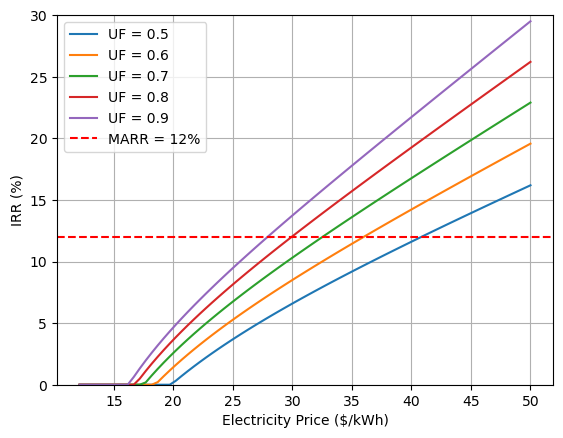

In [18]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the input data
input_data = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


# Define the range of electricity prices and utilization factors
elec_prices = np.linspace(0, 50, 100)  # replace with your range of electricity prices
ufs = [0.5, 0.6,0.7, 0.8, 0.9]  # replace with your range of utilization factors

# Calculate the period of one year
period_of_one_year = 24 * 365

# Create a DataFrame to store the results
df = pd.DataFrame(columns=["elec_price", "uf", "IRR"])

# Calculate the IRR for each combination of electricity price and utilization factor
for elec_price in elec_prices:
    for uf in ufs:
        # Calculate the investment cost
        investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000  # 1000 is required to convert MW to kW

        # Calculate the production power
        production_power = input_data['Capacity']['value'] * uf * period_of_one_year

        # Calculate the production cost
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001  # 0.001 is required due to $/Mbtu and Btu/kWh

        # Calculate the revenue
        revenue = production_power * elec_price

        # Create a list of net cash flows
        cash_flows = [-investment_cost] + [revenue - production_cost] * (input_data['Expected plant life']['value'] -1 )

        # Calculate the IRR
        irr = npf.irr(cash_flows)

        if irr<0:
            irr=0

        # Convert IRR to percentage
        irr_percent = irr * 100

        # Add the results to the DataFrame
        # df = df.append({"elec_price": elec_price, "uf": uf, "IRR": irr_percent}, ignore_index=True)

        # Add the results to the DataFrame
        df_to_append = pd.DataFrame([{"elec_price": elec_price, "uf": uf, "IRR": irr_percent}], columns=["elec_price", "uf", "IRR"])
        df = pd.concat([df, df_to_append], ignore_index=True)

# Plot the IRR for each utilization factor
for uf in ufs:
    df_uf = df[df["uf"] == uf]
    plt.plot(df_uf["elec_price"], df_uf["IRR"], label=f"UF = {uf}")

# Set the y-axis limit
plt.ylim(0, 30)
# plt.xlim(0, 50)

# Add a grid
plt.grid(True)

# Add a horizontal line for the MARR
plt.axhline(y=12, color='r', linestyle='--', label="MARR = 12%")

plt.xlabel("Electricity Price ($/kWh)")
plt.ylabel("IRR (%)")
plt.legend()
plt.show()


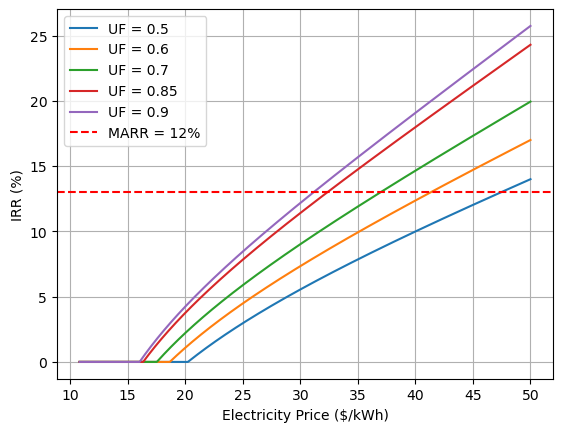

In [56]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def calculate_and_plot(input_data, elec_prices, ufs,MARR):
    # Calculate the period of one year
    period_of_one_year = 24 * 365

    # Create a DataFrame to store the results
    df = pd.DataFrame(columns=["elec_price", "uf", "IRR"])

    # Calculate the IRR for each combination of electricity price and utilization factor
    for elec_price in elec_prices:
        for uf in ufs:
            # Calculate the investment cost
            investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000  # 1000 is required to convert MW to kW

            # Calculate the production power
            production_power = input_data['Capacity']['value'] * uf * period_of_one_year

            # Calculate the production cost
            production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001  # 0.001 is required due to $/Mbtu and Btu/kWh

            # Calculate the revenue
            revenue = production_power * elec_price

            # Create a list of net cash flows
            cash_flows = [-investment_cost] + [revenue - production_cost] * (input_data['Expected plant life']['value'] - 1)

            # Calculate the IRR
            irr = npf.irr(cash_flows)

            # If the IRR is negative, set it to 0
            if irr < 0:
                irr = 0

            # Convert IRR to percentage
            irr_percent = irr * 100

            # Add the results to the DataFrame
            df_to_append = pd.DataFrame([{"elec_price": elec_price, "uf": uf, "IRR": irr_percent}], columns=["elec_price", "uf", "IRR"])
            df = pd.concat([df, df_to_append], ignore_index=True)

    # Plot the IRR for each utilization factor
    for uf in ufs:
        df_uf = df[df["uf"] == uf]
        plt.plot(df_uf["elec_price"], df_uf["IRR"], label=f"UF = {uf}")

    # Set the y-axis limit
    #plt.ylim(0, 30)

    # Add a grid
    plt.grid(True)

    # Add a horizontal line for the MARR
    plt.axhline(y=MARR, color='r', linestyle='--', label="MARR = 12%")

    plt.xlabel("Electricity Price ($/kWh)")
    plt.ylabel("IRR (%)")
    plt.legend()
    plt.show()
    return df

input_data = {
    "Investment Cost": {"value": 1200, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9800, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.10, "unit": "$/Mbtu"},
    "Capacity": {"value": 400, "unit": "MW"}
}


# Assumptions
uf=0.85 # utilisation factor (%)
elec_price=31 #energy sell price ($/MWh)


# Define the range of electricity prices and utilization factors
elec_prices = np.linspace(0, 50, 1000)  # replace with your range of electricity prices
ufs = [0.5, 0.6, 0.7, 0.85, 0.9]  # replace with your range of utilization factors
MARR=13
# Call the function
xx=calculate_and_plot(input_data, elec_prices, ufs, MARR)


#### changing uf by year


In [93]:
investment_cost

480000000

In [97]:
cash_flows

[-480000000.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0]

In [98]:
for year in range(1, input_data['Expected plant life']['value'] ):
    print(year)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [119]:
def calculate_irr_with_variable_utilization(input_data, initial_uf, initial_elec_price, MARR):
    period_of_one_year = 24 * 365

    # Calculate the investment cost
    investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000

    # List to store annual cash flows
    cash_flows = [-investment_cost]

    uf = initial_uf
    # Iterate through each year of the plant's life
    # for year in range(1, input_data['Expected plant life']['value'] ):
    #     if year >= 20:
    #         uf = initial_uf * 0.85 * 0.85
    #         elec_price
    #     elif year >= 10:
    #         uf = initial_uf * 0.85
    #     else:
    #         uf = initial_uf

    # for year in range(1, input_data['Expected plant life']['value'] ):
    #     if year <=10:
    #        elec_price = initial_elec_price
    #     else:
    #         elec_price = initial_elec_price - 4

    for year in range(1, input_data['Expected plant life']['value'] ):
        if year <=20:
           elec_price = 31
        else:
            elec_price = 35   


        # Calculate annual production power
        production_power = input_data['Capacity']['value'] * uf * period_of_one_year

        # Calculate annual production cost
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001

        # Calculate annual revenue
        revenue = production_power * elec_price

        # Annual net cash flow
        net_cash_flow = revenue - production_cost

        # Append to cash flows
        cash_flows.append(net_cash_flow)

    # Calculate the IRR
    irr = npf.irr(cash_flows)
    irr=irr*100
    return irr

# Usage of the function
initial_uf = 0.85  # Initial utilization factor
elec_price = 35   # Convert $/MWh to $/kWh
MARR = 13  # Minimum Acceptable Rate of Return
irr_with_changes = calculate_irr_with_variable_utilization(input_data, initial_uf, elec_price, MARR)


In [120]:
irr_with_changes

12.267567213330132

In [122]:
def calculate_irr_with_variable_utilization(input_data, initial_uf, elec_price_scenario):
    period_of_one_year = 24 * 365
    investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000
    cash_flows = [-investment_cost]

    for year in range(1, input_data['Expected plant life']['value']):
        # Set electricity price based on the year and scenario
        if elec_price_scenario == "scenario1":
            elec_price = 35 if year <= 10 else 31  # First scenario
        elif elec_price_scenario == "scenario2":
            elec_price = 31 if year <= 20 else 35  # Second scenario

        production_power = input_data['Capacity']['value'] * initial_uf * period_of_one_year
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001
        revenue = production_power * elec_price
        net_cash_flow = revenue - production_cost
        cash_flows.append(net_cash_flow)

    irr = npf.irr(cash_flows) * 100  # Convert to percentage
    return irr

# Call the function for each scenario
input_data = {
    "Investment Cost": {"value": 1200, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9800, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.10, "unit": "$/Mbtu"},
    "Capacity": {"value": 400, "unit": "MW"}
}

initial_uf = 0.85
MARR = 13

irr_scenario1 = calculate_irr_with_variable_utilization(input_data, initial_uf, "scenario1")
irr_scenario2 = calculate_irr_with_variable_utilization(input_data, initial_uf, "scenario2")


In [123]:
irr_scenario1

14.08987895613052

In [124]:
irr_scenario2

12.267567213330132

In [163]:


period_of_one_year = 24 * 365
investment_cost = input_data['Investment Cost']['value'] * 100 * 1000
fixed_costs=360000
uf = 0.01
fuel_cost_ = 2.90
production_power = 100 * uf * period_of_one_year
heat_rate= 13000
production_cost = production_power * heat_rate * fuel_cost_ * 0.001

revenue = production_power * elec_price
net_cash_flow = revenue - fixed_costs - production_cost


In [165]:
(fixed_costs + production_cost)/production_power

78.7958904109589

In [171]:
heat_rate * fuel_cost_ * 0.001 +0.410958904109589


38.110958904109594

In [168]:
360000/(8760*100)

0.410958904109589

In [167]:
# Constants
capacity_mw = 100  # MW
hours_in_year = 8760  # hours
utilization_rate = 0.01  # 1%
heat_rate = 13000  # Btu/kWh
fuel_cost_per_mbtu = 2.90  # $/MBtu
fixed_cost_per_year = 360000  # $
conversion_factor = 0.001  # $/MBtu to $/kWh

# Annual Production at 1% utilization rate (in MWh)
annual_production_mwh = capacity_mw * hours_in_year * utilization_rate

# Annual Fuel Cost
annual_fuel_cost = annual_production_mwh * heat_rate * fuel_cost_per_mbtu * conversion_factor

# Total Annual Cost (Fixed + Variable)
total_annual_cost = fixed_cost_per_year + annual_fuel_cost

# Minimum Price per MWh
minimum_price_per_mwh = total_annual_cost / annual_production_mwh

# Average Production Cost Calculation
# Variable Cost per MWh
variable_cost_per_mwh = heat_rate * fuel_cost_per_mbtu * conversion_factor

# Fixed Cost Contribution per MWh (based on full capacity)
fixed_cost_contribution_per_mwh = fixed_cost_per_year / (capacity_mw * hours_in_year)

# Average Production Cost per MWh
average_production_cost_per_mwh = variable_cost_per_mwh + fixed_cost_contribution_per_mwh

minimum_price_per_mwh, average_production_cost_per_mwh



78.7958904109589

In [161]:
def calculate_irr_with_variable_utilization(input_data, initial_uf, elec_price_scenario):
    period_of_one_year = 24 * 365
    investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000
    cash_flows = [-investment_cost]

    uf = 0.85
    fuel_cost_=1.10
    repairing_cost=0
    for year in range(1, input_data['Expected plant life']['value']):
        # Set electricity price based on the year and scenario
        if elec_price_scenario == "scenario1":
            elec_price = 30   # First scenario
        # elif elec_price_scenario == "scenario2":
        #     elec_price = 25 if year > 5 else 31  # Second scenario
        #     fuel_cost_= 1.5 if year > 5 else 1.10
        #     uf= 0.45 if year > 5 else 0.85
        #     repairing_cost = 120000000 if year ==11 else 0 
        elif elec_price_scenario == "scenario2":
            elec_price =  31  # Second scenario
            fuel_cost_=  1.10
            uf= 0.85
            repairing_cost = 120000000 if year ==15 else 0     

        # production_power = input_data['Capacity']['value'] *initial_uf * period_of_one_year
        production_power = input_data['Capacity']['value'] * uf * period_of_one_year
        # production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * fuel_cost_ * 0.001
       
        revenue = production_power * elec_price
        net_cash_flow = revenue - production_cost - repairing_cost
        cash_flows.append(net_cash_flow)

    irr = npf.irr(cash_flows) * 100  # Convert to percentage
    return irr,cash_flows

# Call the function for each scenario
input_data_A = {
    "Investment Cost": {"value": 1100, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 7500, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.15, "unit": "$/Mbtu"},
    "Capacity": {"value": 600, "unit": "MW"}
}

input_data_B = {
    "Investment Cost": {"value": 650, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 6500, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 2.75, "unit": "$/Mbtu"},
    "Capacity": {"value": 600, "unit": "MW"}
}

input_data_C = {
    "Investment Cost": {"value": 1000, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9800, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.10, "unit": "$/Mbtu"},
    "Capacity": {"value": 400, "unit": "MW"}
}

initial_uf = 0.85
MARR = 13

# irr_technology_A = calculate_irr_with_variable_utilization(input_data_A, initial_uf, "scenario1")
# irr_technology_B = calculate_irr_with_variable_utilization(input_data_B, initial_uf, "scenario1")
irr_technology_C,cash_flow1 = calculate_irr_with_variable_utilization(input_data_C, initial_uf, "scenario2")


# irr_scenario2 = calculate_irr_with_variable_utilization(input_data, initial_uf, "scenario2")


In [162]:
irr_technology_C


14.148243659609117

In [154]:
cash_flow1


[-400000000,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 -103758960.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0]

In [150]:
def calculate_irr_with_variable_utilization(input_data, initial_uf, elec_price_scenario):
    period_of_one_year = 24 * 365
    investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000  # Convert MW to kW
    cash_flows = [-investment_cost]  # Initial investment cost

    # Variables for fuel cost and utilization factor need to be initialized outside the loop
    fuel_cost_ = input_data['Expected fuel cost']['value']
    uf = initial_uf

    for year in range(1, input_data['Expected plant life']['value'] + 1):  # Loop should run for the plant's expected life
        # Adjust the electricity price, fuel cost, and utilization factor after the fifth year
        if elec_price_scenario == "scenario2" and year > 5:
            elec_price = 25   # Convert $/MWh to $/kWh for revenue calculation
            fuel_cost_ = 1.5
            uf = 0.45
        else:
            elec_price = 31   # Convert $/MWh to $/kWh for revenue calculation

        production_power = input_data['Capacity']['value'] * uf * period_of_one_year
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * fuel_cost_ * 0.001  # Convert Btu/kWh to MMBtu/kWh for cost calculation
        revenue = production_power * elec_price  # Revenue is based on electricity price and production
        net_cash_flow = revenue - production_cost  # Net cash flow for the year
        cash_flows.append(net_cash_flow)  # Append the annual net cash flow to the list

    irr = npf.irr(cash_flows) * 100  # Calculate IRR and convert to percentage
    return irr, cash_flows

# Call the function for Scenario 2
initial_uf = 0.85  # Initial utilization factor
irr_technology_C, cash_flow1 = calculate_irr_with_variable_utilization(input_data_C, initial_uf, "scenario2")


In [151]:
cash_flow1

[-400000000,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 60223248.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0,
 16241040.0]

#### incremental net cash flow

#### mutually exclusive investment alternatives

In [37]:
import numpy_financial as npf
import pandas as pd

def calculate_incremental_cash_flow(input_data1, input_data2, elec_price, uf):
    # Calculate the period of one year
    period_of_one_year = 24 * 365

    # Create a DataFrame to store the results
    df = pd.DataFrame(columns=["Year", "Plant1 Investment", "Plant2 Investment", "Plant1 Production Cost", "Plant2 Production Cost", "Incremental Net Cash Flow"])

    for year in range(input_data1['Expected plant life']['value'] + 1):
        # Calculate the investment cost for each plant
        if year == 0:
            investment_cost1 = input_data1['Investment Cost']['value'] * input_data1['Capacity']['value'] * 1000
            investment_cost2 = input_data2['Investment Cost']['value'] * input_data2['Capacity']['value'] * 1000
        else:
            investment_cost1 = 0
            investment_cost2 = 0

        # Calculate the production power for each plant
        production_power1 = input_data1['Capacity']['value'] * uf * period_of_one_year
        production_power2 = input_data2['Capacity']['value'] * uf * period_of_one_year

        # Calculate the production cost for each plant
        production_cost1 = production_power1 * input_data1['Heat rate at rated output']['value'] * input_data1['Expected fuel cost']['value'] * 0.001
        production_cost2 = production_power2 * input_data2['Heat rate at rated output']['value'] * input_data2['Expected fuel cost']['value'] * 0.001

        if year == 0:
            production_cost1 = 0
            production_cost2 = 0

        # revenue
        revenue1 = production_power1 * elec_price 
        revenue2 = production_power1 * elec_price 

        # Calculate the incremental net cash flow
        incremental_net_cash_flow = (investment_cost1 - investment_cost2) + (production_cost1 - production_cost2) +(revenue1-revenue2)

        # Add the results to the DataFrame
        df_to_append = pd.DataFrame([{"Year": year, "Plant1 Investment": investment_cost1, "Plant2 Investment": investment_cost2, "Plant1 Production Cost": production_cost1, "Plant2 Production Cost": production_cost2, "Incremental Net Cash Flow": incremental_net_cash_flow}], columns=["Year", "Plant1 Investment", "Plant2 Investment", "Plant1 Production Cost", "Plant2 Production Cost", "Incremental Net Cash Flow"])
        df = pd.concat([df, df_to_append], ignore_index=True)

    # Calculate the IRR for the incremental net cash flow
    irr = npf.irr(df["Incremental Net Cash Flow"].tolist())
    if irr < 0:
        irr = 0
    irr_percent = irr * 100

    print(f"The IRR for the incremental net cash flow is: {irr_percent}%")

    return df,irr_percent


In [38]:
input_data_CCGT = {
    "Investment Cost": {"value": 533, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 6927, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 3, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}

#inputs

input_data_coal = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}

uf= 0.8 


df_,Irr_=calculate_incremental_cash_flow(input_data_CCGT, input_data_coal, elec_price, uf)

The IRR for the incremental net cash flow is: 12.563615712403763%


In [134]:
# Call the function for each scenario
input_data_A = {
    "Investment Cost": {"value": 1100, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 7500, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.15, "unit": "$/Mbtu"},
    "Capacity": {"value": 600, "unit": "MW"}
}

input_data_B = {
    "Investment Cost": {"value": 650, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 6500, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 2.75, "unit": "$/Mbtu"},
    "Capacity": {"value": 600, "unit": "MW"}
}



uf= 0.8 

elec_price=30 

df_,Irr_=calculate_incremental_cash_flow(input_data_A, input_data_B, elec_price, uf)

The IRR for the incremental net cash flow is: 14.132265752186445%


In [30]:
Irr_

12.563615712403763

In [34]:
df_irr

,uf,IRR
0,0.500000,7.031772
1,0.666667,10.193092
2,0.833333,13.142256
3,1.000000,15.979409


The IRR for the incremental net cash flow is: 0%
The IRR for the incremental net cash flow is: 6.358103059561504%
The IRR for the incremental net cash flow is: 11.390987886941705%
The IRR for the incremental net cash flow is: 15.979408819698504%


C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

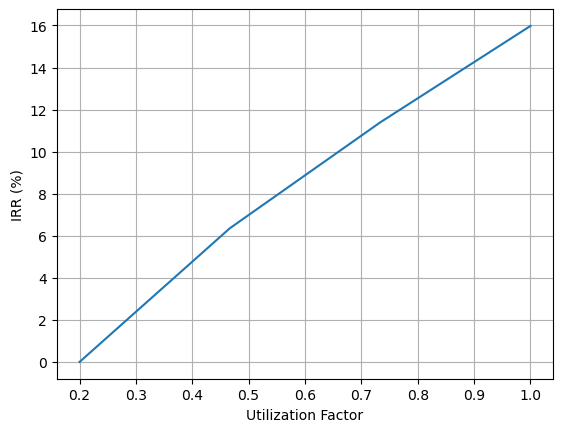

In [36]:
import matplotlib.pyplot as plt

# Define the range of utilization factors
ufs = np.linspace(0.2, 1.0, 4)  # replace with your range of utilization factors

# Create a DataFrame to store the results
df_irr = pd.DataFrame(columns=["uf", "IRR"])

# Calculate the IRR for each utilization factor
for uf in ufs:
    df, irr = calculate_incremental_cash_flow(input_data_CCGT, input_data_coal, elec_price, uf)
    df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)

# Plot the IRR for each utilization factor
plt.plot(df_irr["uf"], df_irr["IRR"])
plt.xlabel("Utilization Factor")
plt.ylabel("IRR (%)")
plt.grid(True)
plt.show()
